**Brian Blaylock**  
*April 28, 2021*

# K-Index
One indicator of thunderstorm potential
https://github.com/Unidata/MetPy/issues/631
    
$$ K = (T_{850} - T_{500}) + Td_{850} - (T_{700} - Td_{700})$$

Where $T$ is temperature and $Td$ is dew point temperature at the level in hPa.

- K values +20 indicate some potential for air mass thunderstorms.
- K values +40 indicate almost 100% chance for air mass thunderstorms,
- with values over +30 to indicate potential MCC's.

Cool temperatures aloft and warm temperatures below are associated with instability at the surface (resulting in rising motion). Dry air aloft will lower the K value because when dry air entrains in a cumulus cloud it restricts it's thunderstorm growth.

In [47]:
from hrrrb.archive import xhrrr
import matplotlib.pyplot as plt

In [2]:
h = xhrrr('2021-04-28 23:00', '(TMP|DPT):(500|700|850) mb')

💡 Info: Downloading [1] GRIB2 files

Download subset from [google]:
✅ Success! Searched for [(TMP|DPT):(500|700|850) mb] and got [6] GRIB fields and saved as /p/cwfs/blaylock/data/hrrr/20210428/subset_20210428_hrrr.t23z.wrfsfcf00.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:04.405608


In [3]:
h

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 3, x: 1799, y: 1059)
Coordinates:
    time           datetime64[ns] 2021-04-28T23:00:00
    step           timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) float64 850.0 700.0 500.0
    latitude       (y, x) float64 21.14 21.15 21.15 21.16 ... 47.86 47.85 47.84
    longitude      (y, x) float64 237.3 237.3 237.3 237.4 ... 299.0 299.0 299.1
    valid_time     datetime64[ns] 2021-04-28T23:00:00
Dimensions without coordinates: x, y
Data variables:
    t              (isobaricInhPa, y, x) float32 281.0 281.0 ... 248.5 248.5
    dpt            (isobaricInhPa, y, x) float32 276.0 275.9 ... 236.9 236.7
Attributes: (12/13)
    GRIB_edition:                   2
    GRIB_centre:                    kwbc
    GRIB_centreDescription:         US National Weather Service - NCEP 
    GRIB_subCentre:                 0
    Conventions:                    CF-1.7
    institution:                    US National Weather Service - NCEP 
    ...                             ...
    url:                            https://storage.googleapis.com/high-resol...
    grid_mapping_name:              lambert_conformal_conic
    standard_parallel:              (38.5, 38.5)
    longitude_of_central_meridian:  262.5
    latitude_of_projection_origin:  38.5
    crs:                            <cartopy.crs.LambertConformal object at 0...

In [4]:
T850 = h.t.sel(isobaricInhPa=850)
T500 = h.t.sel(isobaricInhPa=500)

D850 = h.dpt.sel(isobaricInhPa=850)

T700 = h.t.sel(isobaricInhPa=700)
D700 = h.dpt.sel(isobaricInhPa=700)

In [5]:
K = (T850-T500) + D850 - (T700 - D700) - 273.15

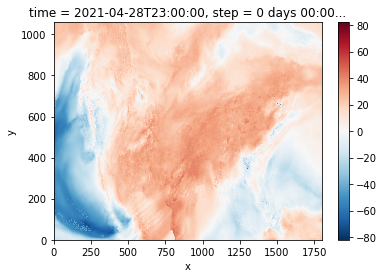

In [6]:
K.plot()

In [7]:
import matplotlib.colors as mcolors
from toolbox.cartopy_tools import common_features, pc

In [43]:
cmap = mcolors.LinearSegmentedColormap.from_list('k-index', ['w', 'orange', 'r'], 3)
cmap.set_over('k')
cmap.set_under('#3333ff10')
norm = mcolors.BoundaryNorm([0, 20, 30, 40], 3)

Text(0.5, 1.0, 'HRRR')

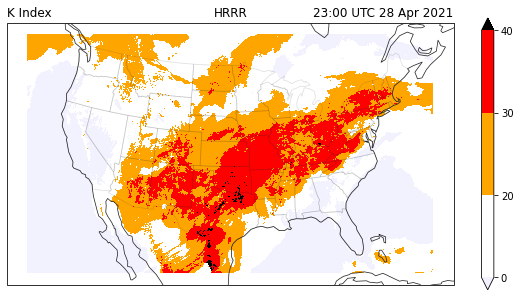

In [59]:
ax = common_features(STATES=True, crs=h.crs, figsize=[10,5])
K.plot(x='longitude', y='latitude', ax=ax, cmap=cmap, norm=norm, transform=pc)

str_date = K.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()
plt.title('K Index', loc='left')
plt.title(str_date, loc='right')
plt.title('HRRR', loc='center')